# HR Analytics Project- Understanding the Attrition in HR
### Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


### Dataset Link-
### •	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\pprasad_hr_project.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

INT 64 :

'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

OBJECT :

'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'

INFORMATION :
COLUMNS : 1470 

ROWS : 35

NO NULL VALUE PRESENT

ATRRITION IS OUR OUTPUT VARIABLE.

In [5]:
df.duplicated().sum()

0

<Axes: >

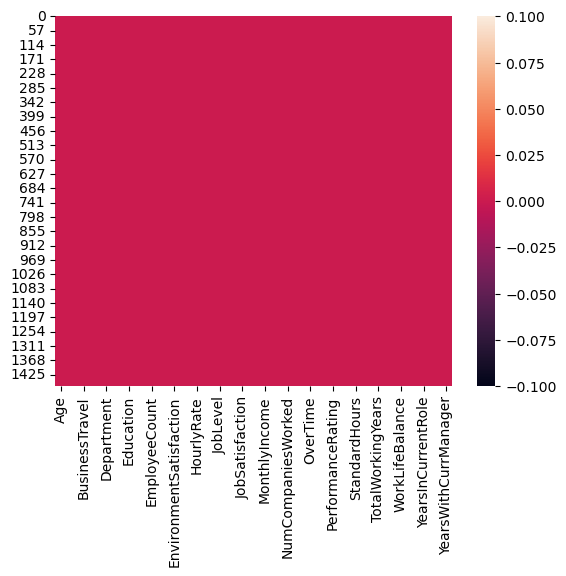

In [6]:
sns.heatmap(df.isna())

No missing values available 

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.describe().T     # T use for Transform

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

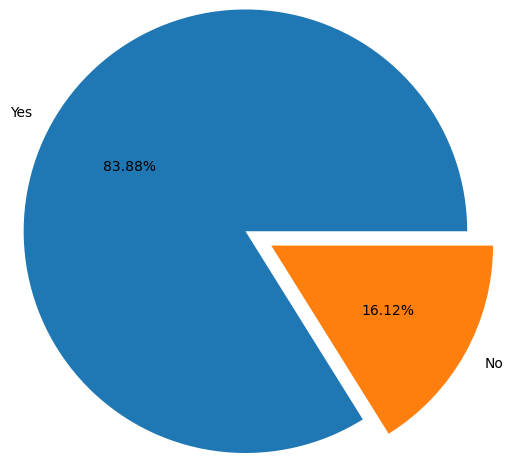

In [15]:
labels = 'Yes', 'No'
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(), labels = labels, autopct = '%2.2f%%', radius = 1.5, explode=[0.1,0.1])
plt.show()

### 83.88% Employee have Attrition 'Yes' means they not leaving company, 16.12% employee have Attrition 'No' means they leaving company.

### Check value counts categorical feacture available in dataset.

In [19]:
feacture = ['Attrition', 'BusinessTravel', 'Department', 
            'EducationField', 'Gender', 'JobRole',
            'MaritalStatus', 'Over18', 'OverTime']
for i in feacture :
    print (i)
    print(df[i].value_counts())
    print("-"*100)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------------------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      882
Female    588
Name: Gender, dtype: int64
----------------

###  Check Value counts of Ordinal features available

In [27]:
ordinal = ['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance']

for i in ordinal:
    print(i)
    print(df[i].value_counts())
    print("-"*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
----------------------------------------------------------------------------------------------------
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
----------------------------------------------------------------------------------------------------
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
----------------------------------------------------------------------------------------------------
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
----------------------------------------------------------------------------------------------------
PerformanceRating
3    124

Education: 1- 'Below College' , 2 -'College', 3 -'Bachelor', 4- 'Master' ,5 -'Doctor'

EnvironmentSatisfaction: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'

JobInvolvement: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'

JobSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'

PerformanceRating: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'

RelationshipSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'

WorkLifeBalance: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best'

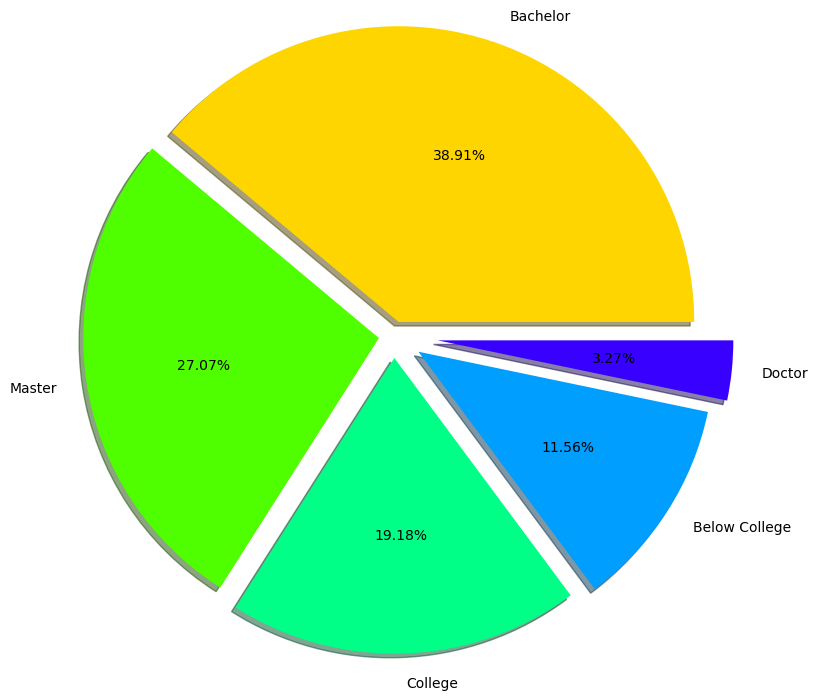

In [42]:
## check pie chart of Education, EducationField, Department

feacture ='Bachelor','Master','College','Below College','Doctor'

fig, ax  = plt.subplots()

ax.pie(df['Education'].value_counts(),labels = feacture,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True)

plt.show()

In [45]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

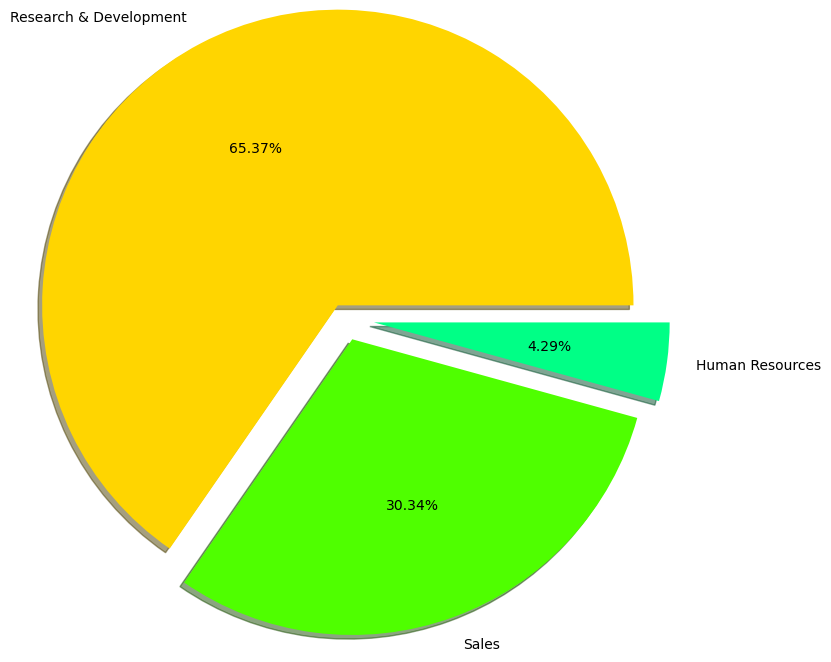

In [46]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [48]:
pd.crosstab([df.Education], [df.Department], margins = True)

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


### By using pie we can clear that in Research & Development Department 65.37% employee working, in sales 30.34% and in Human Resources 4.29% employee working.

In [49]:
pd.crosstab([df.Education], [df.Department, df.Attrition], margins = True)

Department Human Resources     Research & Development      Sales       All
Attrition               No Yes                     No  Yes    No Yes      
Education                                                                 
1                        4   1                     96   19    39  11   170
2                       10   3                    159   23    69  18   282
3                       23   4                    323   56   127  39   572
4                       12   3                    223   32   105  23   398
5                        2   1                     27    3    14   1    48
All                     51  12                    828  133   354  92  1470

In [50]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

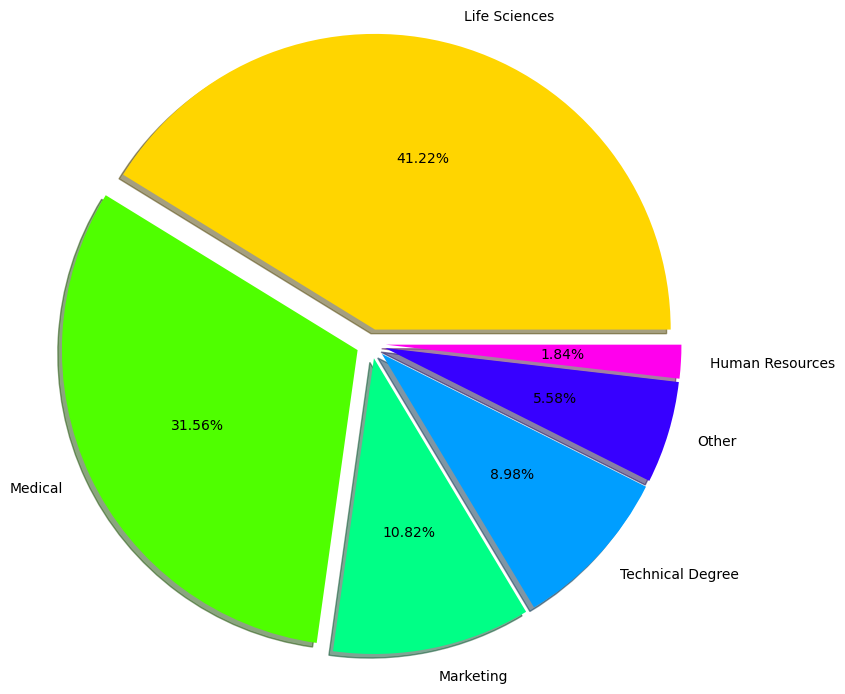

In [51]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1],shadow=True)
plt.show()

In [52]:
pd.crosstab([df.Education], [df.EducationField], margins = True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [53]:
pd.crosstab([df.Education], [df.EducationField, df.Attrition], margins = True)

EducationField Human Resources     Life Sciences     Marketing     Medical  \
Attrition                   No Yes            No Yes        No Yes      No   
Education                                                                    
1                            1   1            59   8        10   4      53   
2                            2   0            98  18        18   6      84   
3                           12   4           196  37        44  15     158   
4                            4   1           148  25        43   9      91   
5                            1   1            16   1         9   1      15   
All                         20   7           517  89       124  35     401   

EducationField     Other     Technical Degree       All  
Attrition      Yes    No Yes               No Yes        
Education                                                
1               10     3   2               13   6   170  
2               15    18   1               18   4   282  
3               25    22   2               41  16   572  
4               13    27   6               27   4   398  
5                0     1   0                1   2    48  
All             63    71  11              100  32  1470

In [54]:
pd.crosstab([df.Department], [df.EducationField], margins = True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


In [55]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [58]:
pd.crosstab([df.JobRole],[df.Department], margins=True)

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


In [60]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True)

Attrition                                           No  Yes   All
JobRole                   Department                             
Healthcare Representative Research & Development   122    9   131
Human Resources           Human Resources           40   12    52
Laboratory Technician     Research & Development   197   62   259
Manager                   Human Resources           11    0    11
                          Research & Development    51    3    54
                          Sales                     35    2    37
Manufacturing Director    Research & Development   135   10   145
Research Director         Research & Development    78    2    80
Research Scientist        Research & Development   245   47   292
Sales Executive           Sales                    269   57   326
Sales Representative      Sales                     50   33    83
All                                               1233  237  1470

Percentage of attrition is high in Sales Representative,Laboratory Technician,Human Resources.

<Axes: xlabel='Age', ylabel='count'>

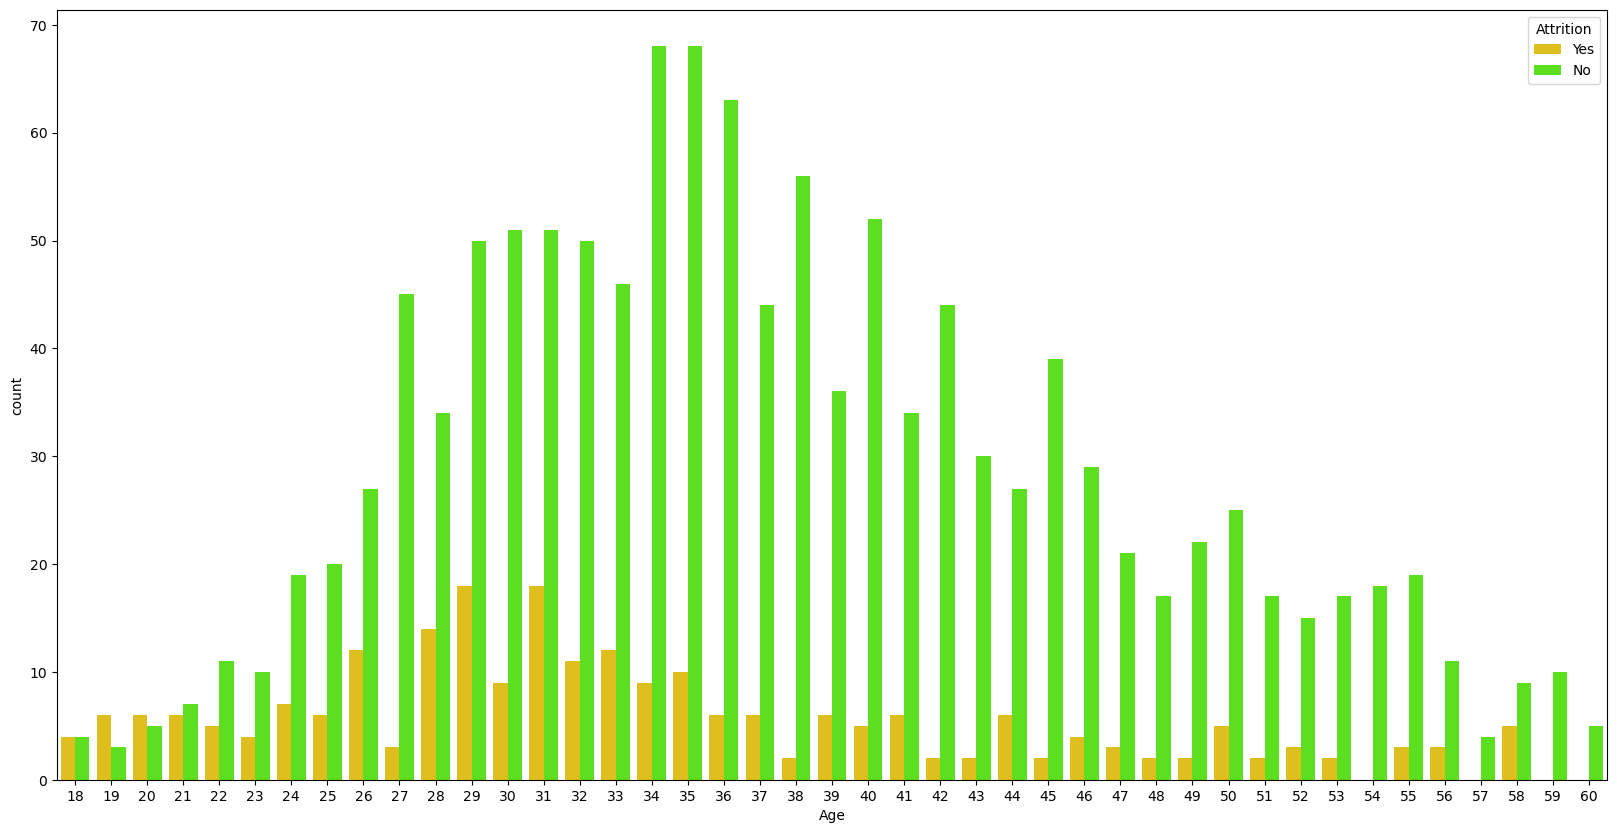

In [65]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Age', hue='Attrition', data=df)

The Attrition rate less in middle Age 31 to 45.

The attrition rate more in 25 to 31

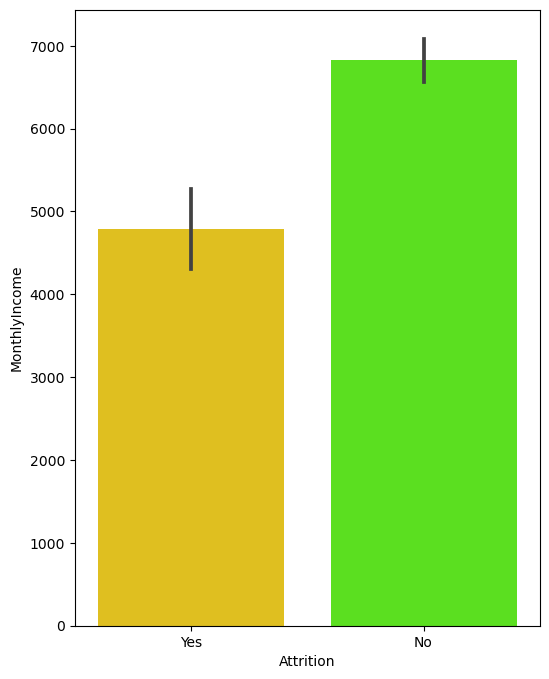

In [71]:
plt.figure(figsize=(6,8))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

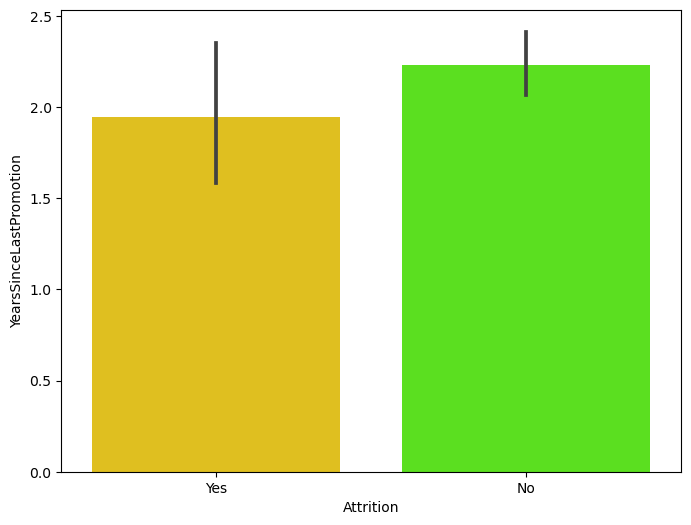

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# ENCODING

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Attrition"] = le.fit_transform(df["Attrition"])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### DROPPING UNWANTED COLUMNS LIKE EmployeeCount, EmployeeNumber, StandardHours, Over18

In [74]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace = True)

In [75]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [76]:
df.shape

(1470, 31)

### Ordinal Encoding for Object variables

##### Here by using Ordinal Encoding method we can encode 7 columns.

In [78]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_column = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

df = encode(df, oe_column)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


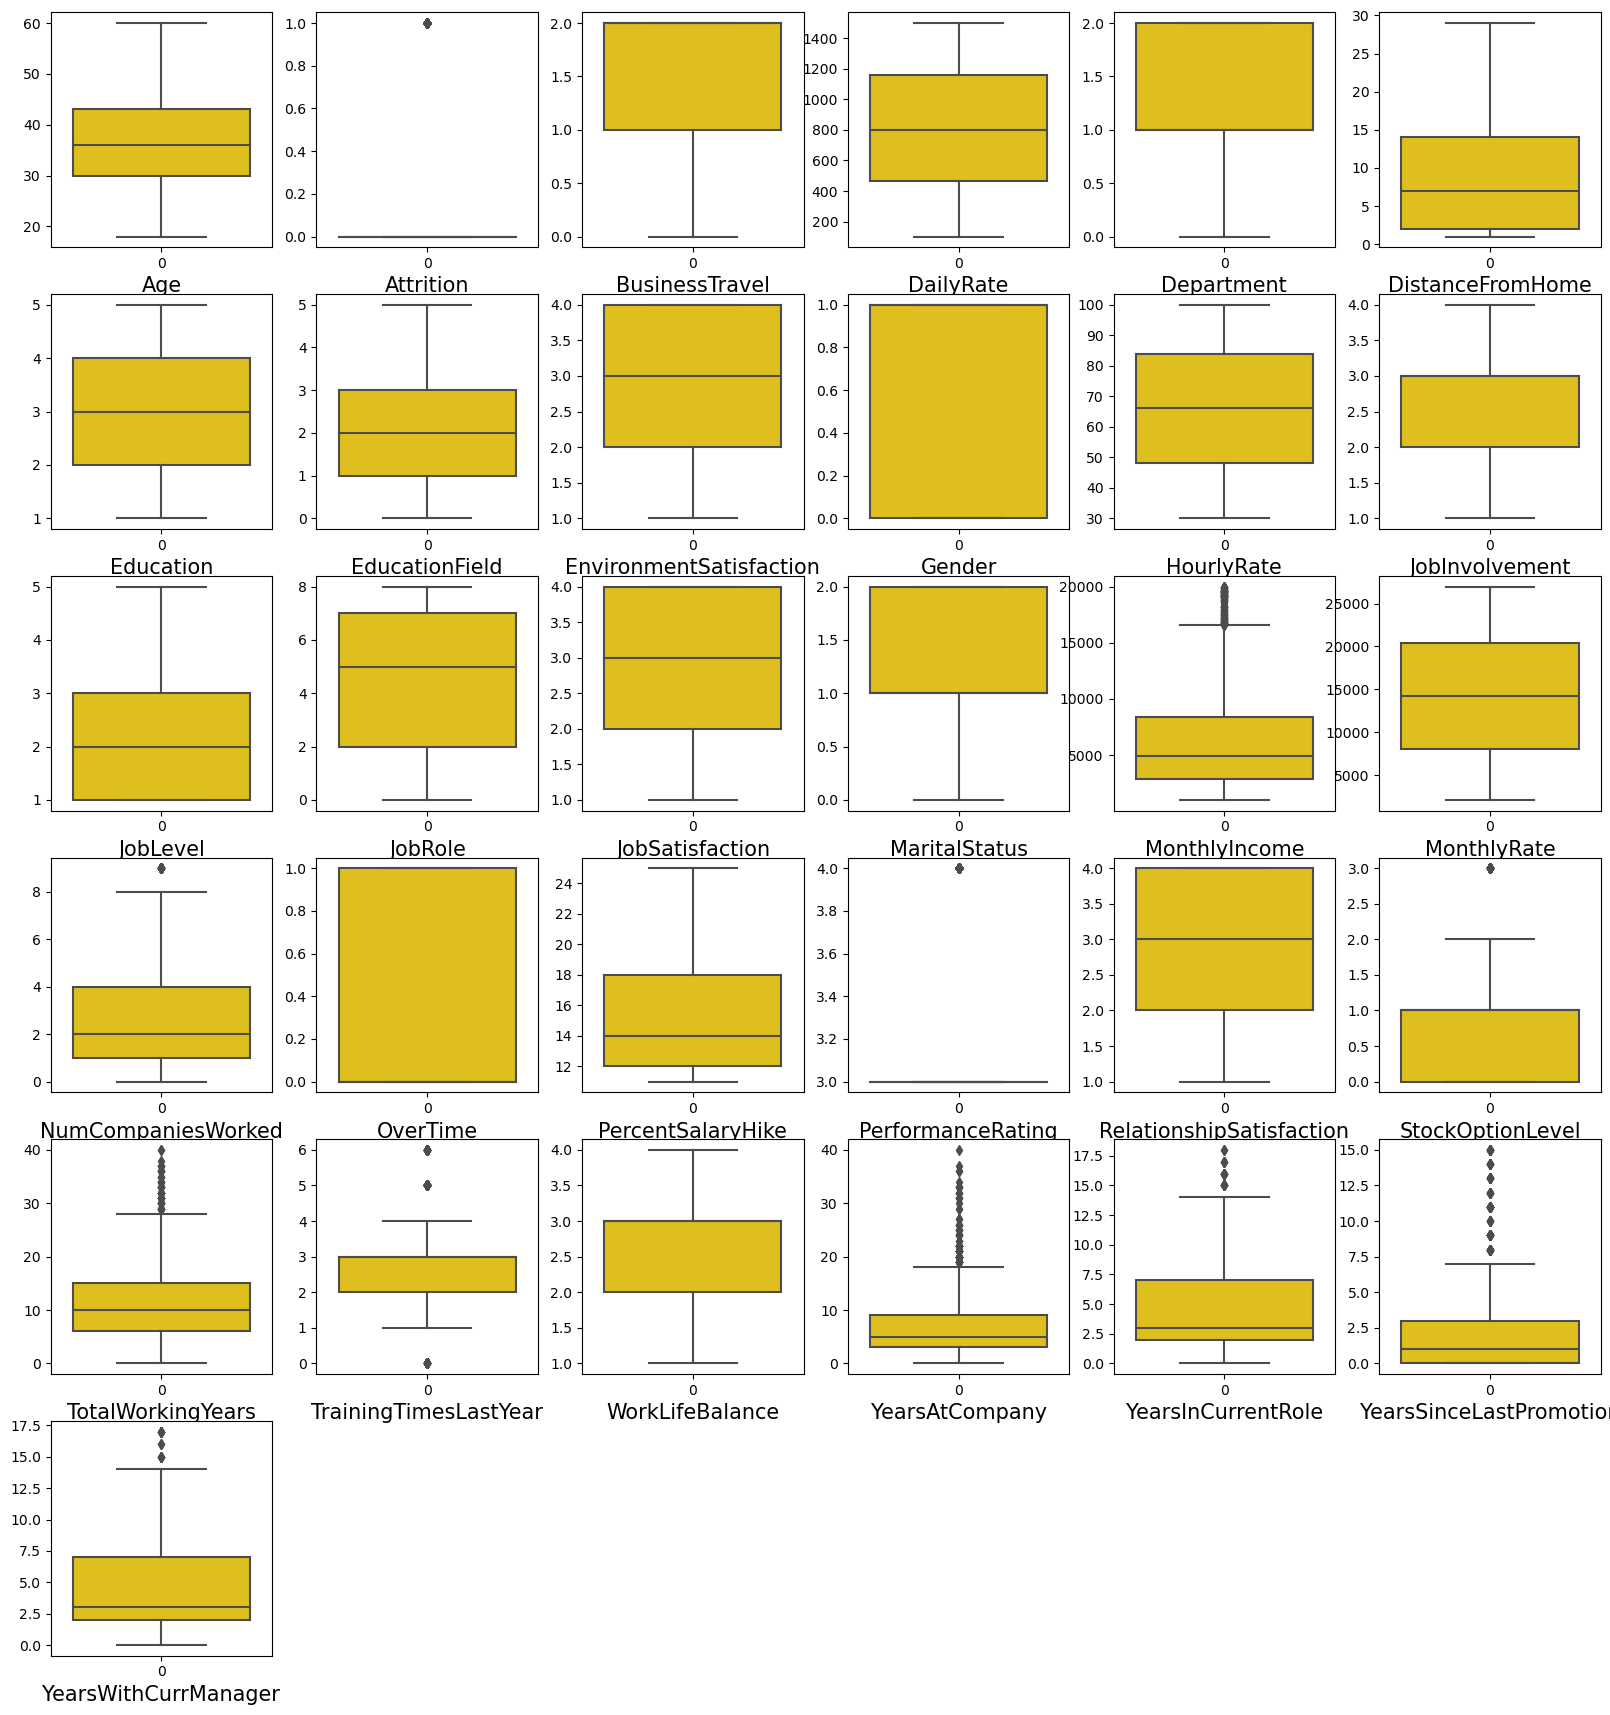

In [81]:
# visualize the outliers using boxplot

plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph <=31:
        plt.subplot(7,6,graph)
        ax = sns.boxplot(data= df[column])
        plt.xlabel(column, fontsize=15)
    graph +=1
plt.show()

### Features containing outliers
"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

In [82]:
from scipy.stats import zscore
z= np.abs(zscore(df))

threshold = 3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [83]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [84]:
x = df.drop(['Attrition'], axis =1)
y = df['Attrition']

### use power transform to reduce skewness 

In [ ]:
from sklearn.preprocessing import power_transform

df = power_transform(x)
df = pd.DataFrame(df, columns=x.columns)
df.skew()

In [85]:
from sklearn.preprocessing import power_transform

df = power_transform(x)
df = pd.DataFrame(df, columns = x.columns)

df.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.032831
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

In [86]:
# check correlation 
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.023122,0.008698,-0.031705,-0.020217,0.222197,-0.042503,0.010458,-0.034937,0.024993,...,0.000396,0.049067,0.074398,0.688330,-0.017274,-0.019839,0.296016,0.214870,0.181112,0.205007
BusinessTravel,0.023122,1.000000,-0.002284,-0.008546,-0.004196,0.002295,0.033321,0.006739,-0.020448,0.027346,...,-0.026814,-0.039262,-0.008863,0.032963,0.011046,-0.013531,-0.013268,-0.023616,-0.034572,-0.019191
DailyRate,0.008698,-0.002284,1.000000,0.009475,-0.006339,-0.015889,0.038007,0.018745,-0.009390,0.024923,...,0.000446,0.009514,0.041513,0.020035,0.001518,-0.040560,-0.012831,0.010738,-0.038267,-0.003915
Department,-0.031705,-0.008546,0.009475,1.000000,0.028267,0.008091,0.083399,-0.018705,-0.042226,-0.003057,...,-0.023715,-0.021470,-0.011815,-0.007675,0.040729,0.019835,0.019416,0.051042,0.019560,0.025185
DistanceFromHome,-0.020217,-0.004196,-0.006339,0.028267,1.000000,0.018890,0.016314,-0.010807,0.007120,0.018471,...,0.011620,0.008565,0.026372,-0.006758,-0.019278,-0.026194,0.006935,0.014965,-0.001965,0.006663
Education,0.222197,0.002295,-0.015889,0.008091,0.018890,1.000000,-0.040600,-0.027374,-0.015405,0.017171,...,-0.023231,-0.011414,0.015644,0.168722,-0.021986,0.012489,0.063270,0.059071,0.031791,0.057298
EducationField,-0.042503,0.033321,0.038007,0.083399,0.016314,-0.040600,1.000000,0.038244,-0.008876,-0.019989,...,-0.002094,-0.006867,-0.015419,-0.013070,0.054753,0.042226,-0.000861,0.001852,0.014959,0.013809
EnvironmentSatisfaction,0.010458,0.006739,0.018745,-0.018705,-0.010807,-0.027374,0.038244,1.000000,0.001118,-0.052050,...,-0.029372,0.006627,0.012090,-0.015235,-0.018413,0.025734,0.006821,0.016828,0.028181,-0.000664
Gender,-0.034937,-0.020448,-0.009390,-0.042226,0.007120,-0.015405,-0.008876,0.001118,1.000000,0.000237,...,-0.013859,0.022709,0.011432,-0.044449,-0.037641,0.000237,-0.041930,-0.038321,-0.026019,-0.026981
HourlyRate,0.024993,0.027346,0.024923,-0.003057,0.018471,0.017171,-0.019989,-0.052050,0.000237,1.000000,...,-0.002657,0.001166,0.049036,-0.007556,-0.011174,-0.009125,-0.028621,-0.029461,-0.050841,-0.018600


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()

vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

vif['Features']= df.columns

vif

,VIF,Features
0,2.103475,Age
1,1.015631,BusinessTravel
2,1.022320,DailyRate
3,2.027022,Department
4,1.014061,DistanceFromHome
5,1.068566,Education
6,1.027363,EducationField
7,1.021627,EnvironmentSatisfaction
8,1.020116,Gender
9,1.022891,HourlyRate


### We can see that multicollinerity is within permissible limit of 10.

In [91]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x_scale = scaler.fit_transform(x)

# Model Building

In [92]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [93]:
x_train, y_train, x_test, y_test = train_test_split(x,y,random_state = 42, test_size = 0.33)

In [97]:
x_train.shape

(984, 30)

In [98]:
y_train.shape

(486, 30)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

print(classification_report(y_test, y_pred))

Best accuracy is 0.8786008230452675 on Random_state 123
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       413
           1       0.50      0.01      0.03        73

    accuracy                           0.85       486
   macro avg       0.68      0.51      0.47       486
weighted avg       0.80      0.85      0.78       486



In [109]:
# checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8621399176954733
[[405   8]
 [ 59  14]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       413
           1       0.64      0.19      0.29        73

    accuracy                           0.86       486
   macro avg       0.75      0.59      0.61       486
weighted avg       0.84      0.86      0.83       486



In [110]:
# checking accuracy for ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8621399176954733
[[407   6]
 [ 61  12]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       413
           1       0.67      0.16      0.26        73

    accuracy                           0.86       486
   macro avg       0.77      0.57      0.59       486
weighted avg       0.84      0.86      0.82       486



In [111]:
# checking accuracy for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.7674897119341564
[[346  67]
 [ 46  27]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       413
           1       0.29      0.37      0.32        73

    accuracy                           0.77       486
   macro avg       0.58      0.60      0.59       486
weighted avg       0.79      0.77      0.78       486



## use hyperparameter tunning

In [112]:
from sklearn.model_selection import GridSearchCV

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=348)

In [115]:
# write one fuction and call as many as times to check accuracy_score of different models.

def metric_score (clf, x_train, x_test, y_train, y_test, train = True ):
    if train :
        y_pred = clf.predict(x_train)
        
        print("\n ____________TRAIN RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_train, y_pred) * 100:.2f}%")
   
    
    elif train == False:
        
        pred = clf.predict(x_test)
 
        print("\n ____________TEST RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_test, pred) * 100:.2f}%")
    
        print('\n\n TEST CLASSIFICATION REPORT\n', classification_report(y_test, pred, digits=2))  #model confidence/accuracy
    

In [116]:
# model initiation

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [117]:
# We are tunnig four Imortant Hyperparameters right now, we are passing the different values for both parameters.

param_grid = {
            'criterion':['gini','entropy'],    
            'max_depth': range(10,15),         
            'min_samples_leaf': range(2,6),    
            'min_samples_split': range(3,8),    
            'max_leaf_nodes': range(20,50)      
}     

In [118]:
gridsearch = GridSearchCV(estimator = clf, 
                           param_grid= param_grid,  
                           cv=5, 
                           n_jobs = -1)

In [119]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(20, 50),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [120]:
best_parameters = gridsearch.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 14, 'max_leaf_nodes': 32, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [123]:
# Initiate DecisionTreeClassifier with new parameters and train

dtc = DecisionTreeClassifier(criterion ='gini',  max_depth = 14,  min_samples_leaf = 3,  
                             min_samples_split = 4, max_leaf_nodes = 32 )

# Train the model

dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=32, min_samples_leaf=3,
                       min_samples_split=4)

In [138]:
# call the fuction and pass dataset to check train and test score

metric_score (dtc, x_train, x_test, y_train, y_test, train = True)  # this is for training score

metric_score (dtc, x_train, x_test, y_train, y_test, train = False)  # this is for testing score


 ____________TRAIN RESULT______________
Accuracy Score : 92.11%

 ____________TEST RESULT______________
Accuracy Score : 79.62%


 TEST CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       297
           1       0.46      0.35      0.40        71

    accuracy                           0.80       368
   macro avg       0.66      0.63      0.64       368
weighted avg       0.78      0.80      0.79       368



In [137]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
predRFC = clf.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8369565217391305
[[294   3]
 [ 57  14]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       297
           1       0.82      0.20      0.32        71

    accuracy                           0.84       368
   macro avg       0.83      0.59      0.61       368
weighted avg       0.83      0.84      0.79       368



In [136]:
# checking accuracy for ExtraTreesClassifier
#final model

clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)
predET = clf.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8369565217391305
[[294   3]
 [ 57  14]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       297
           1       0.82      0.20      0.32        71

    accuracy                           0.84       368
   macro avg       0.83      0.59      0.61       368
weighted avg       0.83      0.84      0.79       368



In [133]:
from pickle import dump
dump(clf,open('hr_analytics_project.pkl','wb'))

In [134]:
import pickle
loaded_model = pickle.load(open('hr_analytics_project.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

84.23913043478261


In [135]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,358,359,360,361,362,363,364,365,366,367
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1


# END